In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Average temperature per season

Temperature changes in each season from 1750 to 2015.

In [2]:
global_temp = pd.read_csv("../TERN/Data Analysis/Climate Change/Climate Change Earth Surface Temperature Data/GlobalLandTemperaturesByMajorCity.csv")

In [3]:
global_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [5]:
global_temp["AverageTemperature"].describe()

count    228175.000000
mean         18.125969
std          10.024800
min         -26.772000
25%          12.710000
50%          20.428000
75%          25.918000
max          38.283000
Name: AverageTemperature, dtype: float64

In [6]:
global_temp = global_temp[['dt', 'City', 'AverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)
global_temp['City'] = global_temp['City']


#SPRING SEASON IN INDIA (VASANTA RITU)
#SUMMER SEASON IN INDIA (GRISHMA RITU)
#RAINY SEASON IN INDIA (VARSHA RITU)
#AUTUMN SEASON IN INDIA (SHARAD RITU)
#PRE- WINTER SEASON IN INDIA (HEMANT RITU)
#WINTER SEASON IN INDIA (SHISHIR RITU)

def find_season(month):
    if month >= 3 and month <= 4:
        return 'spring'
    elif month >= 5 and month <= 6:
        return 'summer'
    elif month >= 7 and month <= 8:
        return 'rainy'
    elif month >= 9 and month <= 10:
        return 'autumn'
    elif month >= 11 and month <= 12:
        return 'pre-winter'
    else:
        return 'winter'
    
minimum_year = global_temp['year'].min()
maximum_year = global_temp['year'].max()
years = range(minimum_year, maximum_year + 1)

global_temp['season'] = global_temp['month'].apply(find_season)
 
spring_temp = []
summer_temp = []
rainy_temp = []
autumn_temp = []
pre_winter_temp = []
winter_temp = []

for year in years:
    current_years_data = global_temp[global_temp['year'] == year]
    spring_temp.append(current_years_data[current_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temp.append(current_years_data[current_years_data['season'] == 'summer']['AverageTemperature'].mean())
    rainy_temp.append(current_years_data[current_years_data['season'] == 'rainy']['AverageTemperature'].mean())
    autumn_temp.append(current_years_data[current_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    pre_winter_temp.append(current_years_data[current_years_data['season'] == 'pre-winter']['AverageTemperature'].mean())
    winter_temp.append(current_years_data[current_years_data['season'] == 'winter']['AverageTemperature'].mean())
    

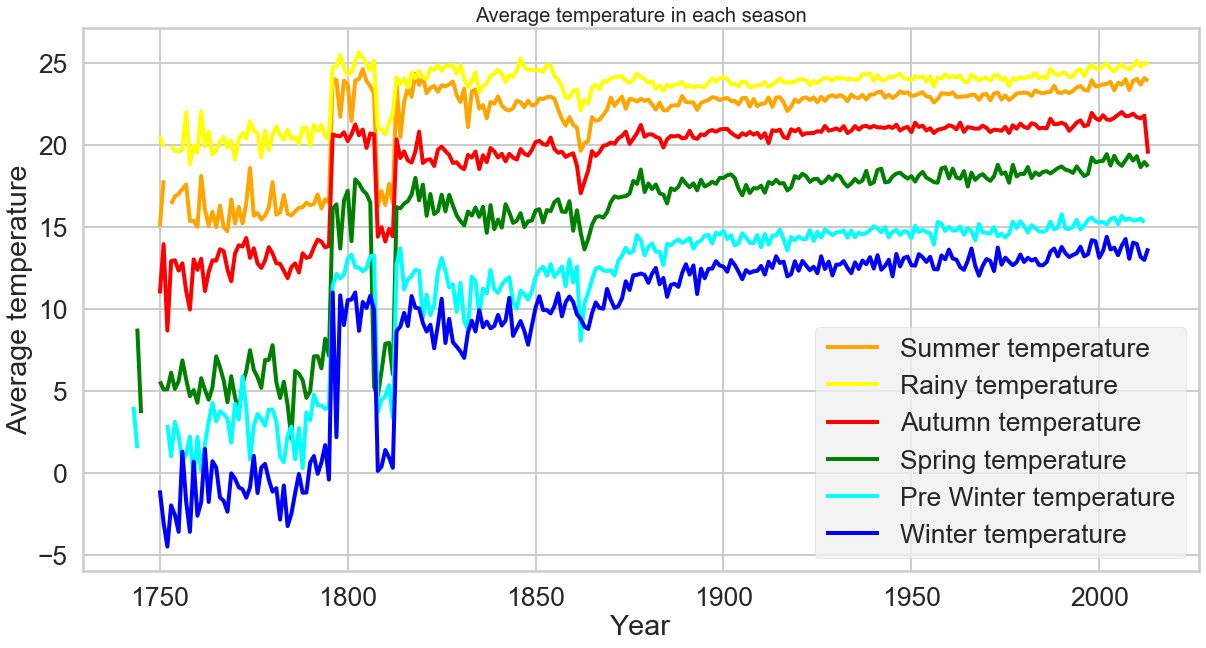

In [7]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=1.2)
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.plot(years, summer_temp, label="Summer temperature", color="orange")
plt.plot(years, rainy_temp, label="Rainy temperature", color="yellow")
plt.plot(years, autumn_temp, label="Autumn temperature", color="red")
plt.plot(years, spring_temp, label="Spring temperature", color="green")
plt.plot(years, pre_winter_temp, label="Pre Winter temperature", color="aqua")
plt.plot(years, winter_temp, label="Winter temperature", color="blue")


ax.set_ylabel("Average temperature")
ax.set_xlabel("Year")
ax.set_title("Average temperature in each season")
plt.legend()

# Maharastra Cities 

In [8]:
temp_by_city = pd.read_csv("C:/Users/Nihal Reddy/Desktop/FILES/TERN/Data Analysis/Climate Change/Climate Change Earth Surface Temperature Data/GlobalLandTemperaturesByCity.csv")
cities = temp_by_city["City"].unique()

maharashtra_cities = {"Bombay", "Nagpur", "Pune", "Aurangabad", "Bhiwandi"}

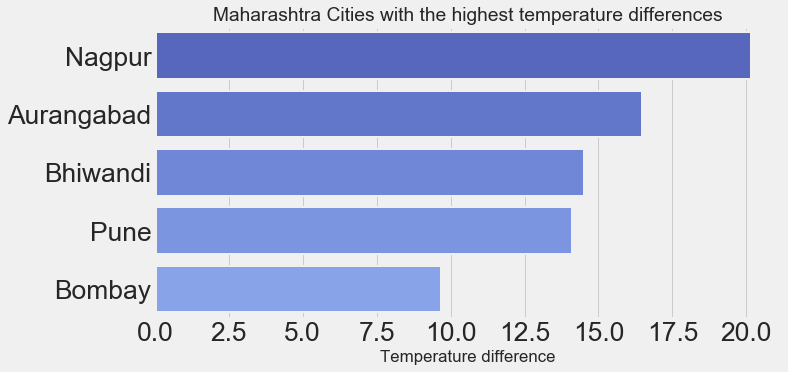

In [9]:
city_list = []
min_max_list = []

for city in cities:
    if (city in maharashtra_cities):
        current_temp = temp_by_city[temp_by_city['City'] == city]['AverageTemperature']
        min_max_list.append((current_temp.max(), current_temp.min()))
        city_list.append(city)
    
# nan cleaning
res_min_max_list = []
res_cities = []

for i in range(len(min_max_list)):
    if not np.isnan(min_max_list[i][0]):
        res_min_max_list.append(min_max_list[i])
        res_cities.append(city_list[i])
        
differences = []

for tpl in res_min_max_list:
    differences.append(tpl[0] - tpl[1])
    

differences, res_cities = (list(x) for x in zip(*sorted(zip(differences, res_cities), key=lambda pair: pair[0], reverse=True)))

# ploting cities with temperature difference
f, ax = plt.subplots(figsize=(10, 5))
sns.set_context("poster", font_scale=0.8)
sns.barplot(x=differences[:15], y=res_cities[:14], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Maharashtra Cities with the highest temperature differences")

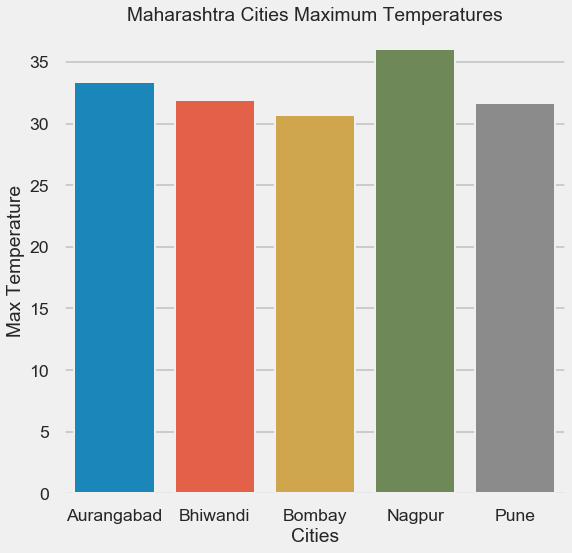

In [10]:
min_max_city = pd.DataFrame(temp_by_city)

max_city = min_max_city.groupby(['City']).max()['AverageTemperature']
max_city = max_city.to_frame().reset_index()
max_city.columns = ['City','City Maximum']
max_city = max_city.loc[max_city['City'].isin(maharashtra_cities)]

f, ax = plt.subplots(figsize=(8, 8))
sns.set_context("poster", font_scale=0.8)
sns.barplot(x='City',y='City Maximum', data=max_city.reset_index())
texts = ax.set(ylabel="Max Temperature", xlabel="Cities", title="Maharashtra Cities Maximum Temperatures")

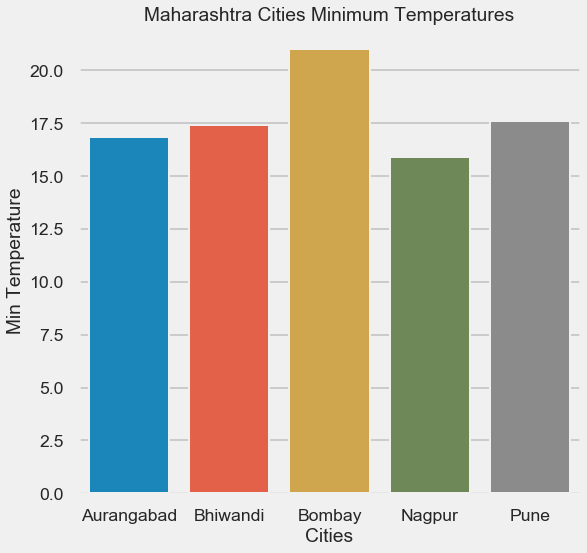

In [11]:
min_city = min_max_city.groupby(['City'],as_index=True).min()['AverageTemperature']
min_city = min_city.to_frame().reset_index()
min_city.columns = ['City','City Minimum']

min_city = min_city.loc[min_city['City'].isin(maharashtra_cities)]

f, ax = plt.subplots(figsize=(8, 8))
sns.set_context("poster", font_scale=0.8)
sns.barplot(x='City',y='City Minimum', data=min_city.reset_index())
texts = ax.set(ylabel="Min Temperature", xlabel="Cities", title="Maharashtra Cities Minimum Temperatures")

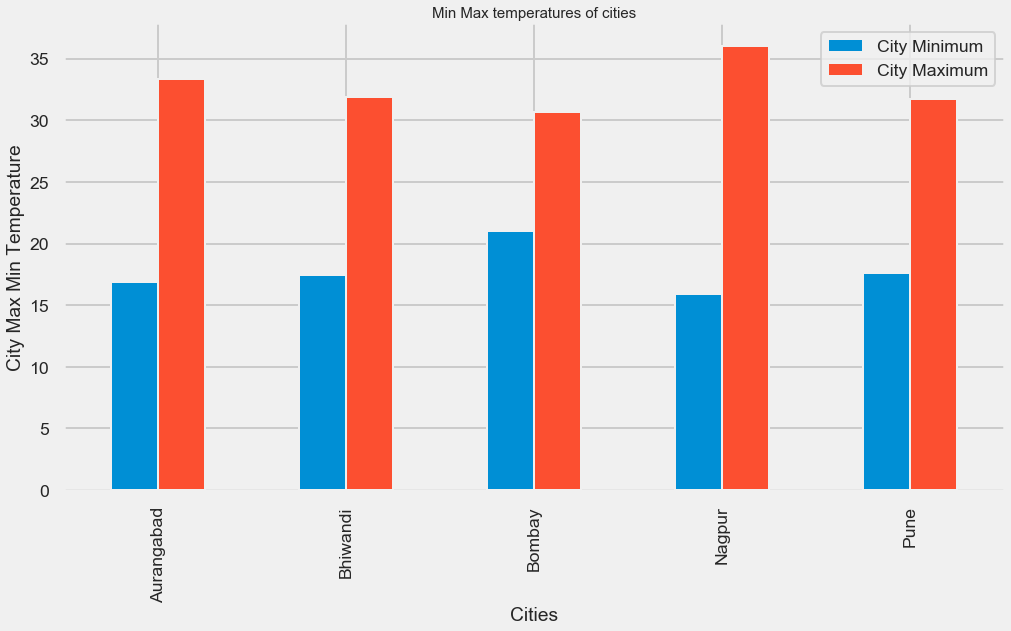

In [12]:
min_max_city_merge = pd.merge(min_city , max_city)
min_max_city_merge = min_max_city_merge.set_index('City')


ax = min_max_city_merge.plot(kind='bar',stacked=False, figsize=(15, 8))
sns.set_context("notebook", font_scale=1.25)
texts = ax.set(ylabel="City Max Min Temperature", xlabel="Cities", title="Min Max temperatures of cities")